Here, we look at a new dataset and try to answer some questions about it.

In [1]:
import pandas as pd

In [2]:
cd ../DSR_Pandas_1/

/Users/rachelberryman/DSR_Pandas_1


In [3]:
df = pd.read_csv('data/iowa_liquor/Iowa_Liquor_Sales.csv', index_col=0)

In [4]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [5]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

1) Which store had the highest total dollars of sales?
    - Is this the same store that had the highest volume (in liters) of alcohol sold?

Removing all "$"s in the DF so that those columns can be parsed as floats.

In [6]:
df = df.replace({'\$': ''}, regex=True)

In [7]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,18.09,27.14,6,162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,18.09,27.14,12,325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,6.40,9.60,2,19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,35.55,53.34,3,160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,6.40,9.60,2,19.20,0.30,0.08


In [8]:
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')

In [9]:
df.groupby('Store Name').sum().sort_values(by='Sale (Dollars)', ascending=False).index[0]

'Hy-Vee #3 / BDI / Des Moines'

In [10]:
df.groupby('Store Name').sum().sort_values(by='Sale (Dollars)', ascending=False)['Sale (Dollars)'].head(1)

Store Name
Hy-Vee #3 / BDI / Des Moines    383131.12
Name: Sale (Dollars), dtype: float64

2) Which item has the highest cost per liter?

3) What is the most common pack size?

In [11]:
df.groupby('Pack').count().sort_values(by='Date', ascending=False).index[0]

12

4) What is the most commonly sold item?

In [12]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [13]:
df.groupby('Item Description').count().sort_values(by='Date', ascending=False).index[0]

'Black Velvet'

5) What day in 2015 was the most money made? (Across all stores)

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
date = df.set_index('Date')

In [16]:
date.groupby([date.index.year, date.index.month, date.index.day]).sum()['Sale (Dollars)'].idxmax()

(2015, 3, 16)

6) Which zip code drinks the most? (in liters)

In [17]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [18]:
df.groupby(['Zip Code']).sum()['Volume Sold (Liters)'].idxmax()

'52402'

7) Does the data set contain any null values?

In [19]:
df.isnull().any().any()

True

8) What is the average state bottle cost?
    - Max cost?
    - Min cost?
    - 50%?

In [20]:
df['State Bottle Cost'].describe()

count    100000.000000
mean          9.455181
std           6.787500
min           0.000000
25%           5.490000
50%           7.870000
75%          11.540000
max         563.400000
Name: State Bottle Cost, dtype: float64

9) What is the total volume sold in Iowa City in 2013?

In [21]:
i_c_2013 = date.groupby([date.index.year, 'City']).sum()
i_c_2013.loc[(slice(2013,2013), slice('IOWA CITY','IOWA CITY')), 'Volume Sold (Liters)']

Date  City     
2013  IOWA CITY    9063.01
Name: Volume Sold (Liters), dtype: float64

10) Which month (average, across all years) sees the highest sales?

In [22]:
date.groupby(date.index.month).sum()['Sale (Dollars)'].idxmax()

10

11) Which item has the lowest cost per bottle in a pack?

In [23]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [24]:
bad_row = df[df['State Bottle Cost']==0]
print(bad_row.shape)
df = df[~df.index.isin(bad_row.index)]

(30, 24)


In [25]:
df.loc[:, 'Cost/bottle'] = df.loc[:, 'State Bottle Cost'] / df.loc[:,'Pack']

In [26]:
df.groupby('Item Description').min()['Cost/bottle'].sort_values(ascending=True).index[0]

'Fireball Cinnamon Whisky'

12) What is the most popular item at Wilkie Liquors?

In [27]:
wilkie = df[df['Store Name']=='Wilkie Liquors']
wilkie.groupby('Item Description').sum().sort_values(by='Bottles Sold', ascending=False).index[0]

'Juarez Gold Dss'

13) From which item does Wilkie Liquors earn the most of its revenue?

In [28]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'Cost/bottle'],
      dtype='object')

In [29]:
wilkie.groupby('Item Description').sum().sort_values(by=['Sale (Dollars)'], ascending=False).index[0]

'Juarez Gold Dss'

In [30]:
i = [1,2,3,4,5,5]
a = pd.DataFrame(index=i)
a.reset_index(inplace=True)
a.columns = ['Old Wrong Index']
a

,Old Wrong Index
0,1
1,2
2,3
3,4
4,5
5,5


14) Do prices for the same item differ across different stores?

yes.

In [31]:
df[df['Item Description'] == 'Captain Morgan Spiced Rum'][['Store Name','State Bottle Cost']].head()

,Store Name,State Bottle Cost
124,"Brothers Market, Inc.",17.75
129,Geno's Liquor,11.30
238,Hy-Vee Food Store / Cedar Falls,10.99
364,Pit Stop Liquor and Tobacco,5.00
476,LIQUOR AND GROCERY DEPOT,5.00


15) Which store sells the most liquor in the city of Des Moines?

In [32]:
cities = df.groupby(['City','Store Name']).sum()
cities.loc['DES MOINES', 'Volume Sold (Liters)'].sort_values(ascending=False).head(1)

Store Name
Hy-Vee #3 / BDI / Des Moines    24239.25
Name: Volume Sold (Liters), dtype: float64

16) Make a plot about at least one of these questions:

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

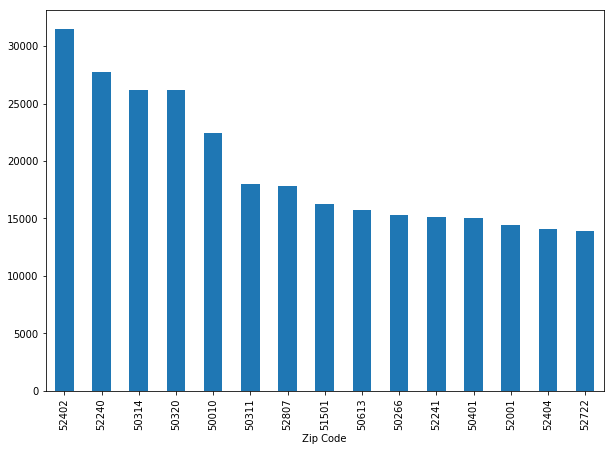

In [34]:
df.groupby(['Zip Code']).sum()['Volume Sold (Liters)'].sort_values(ascending=False).iloc[:15].plot(kind='bar', figsize=(10,7))
plt.show()